### Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class:
-- Iris Setosa -- Iris Versicolour -- Iris Virginica

### Import Modules

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Loading dataset.


In [215]:
df = pd.read_csv('iris.data.csv')
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


## Data Pre-processing

In [216]:
df.columns = ['sepalLength','sepalWidth','petalLength','petalWidth', 'species']

In [217]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [218]:
#check for misisng values
df.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

In [219]:
#Check duplicates
df.duplicated().sum()

3

In [220]:
#To drop duplicated values
df.drop_duplicates(inplace=True)

In [221]:
df.duplicated().sum()

0

In [222]:
#To see statistical outputs
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.052740,3.796575,1.215753
std,0.829562,0.436948,1.753987,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [223]:
#To get total number of each species
species_Total = df['species'].value_counts()
species_Total


Iris-versicolor    50
Iris-virginica     49
Iris-setosa        47
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

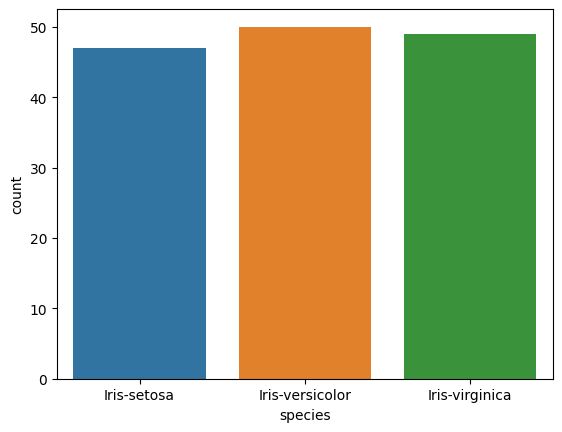

In [224]:
# To Explore the distribution of target classes
sns.countplot(x='species', data=df)


In [225]:
# Perform feature scaling
scaler = StandardScaler()
df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']] = scaler.fit_transform(
    df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']])

the values of the features will be standardized, ensuring that they have a mean of 0 and a standard deviation of 1. This normalization helps in comparing and interpreting the relative importance and effect of different features on the classification model. It also prevents features with larger magnitudes from dominating the learning process.

## Uni-Variate Analysis 

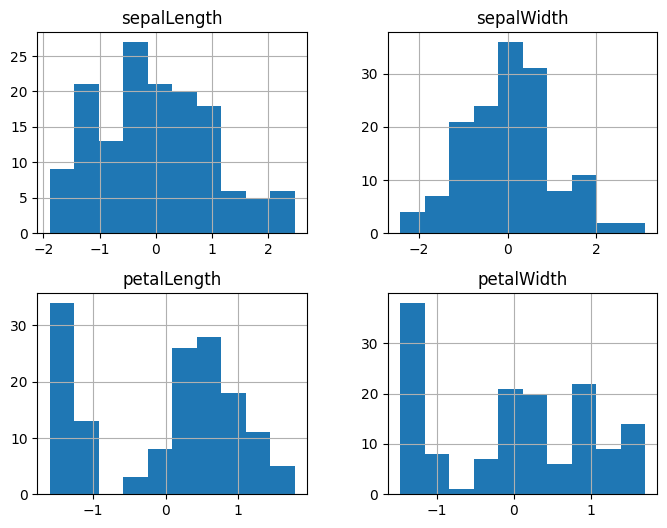

In [226]:
#Histogram for each feature
df.hist(figsize = (8,6))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

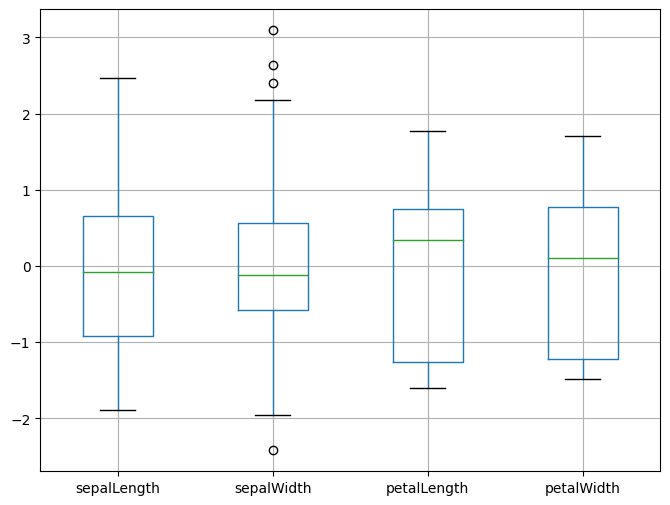

In [227]:
#Boxplot for each column
df.boxplot(figsize = (8,6))
plt.show

Sepal Width shows presence of outliers

In [228]:
# Remove outliers in a specific column by capping the values within a range
def remove_outliers_capping(df, column, threshold):
    upper_bound = df[column].quantile(1 - threshold)
    lower_bound = df[column].quantile(threshold)
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df


In [229]:
# Apply outlier removal with capping on the 'sepalWidth' column with a threshold of 0.05
df = remove_outliers_capping(df, 'sepalWidth', 0.05)


<function matplotlib.pyplot.show(close=None, block=None)>

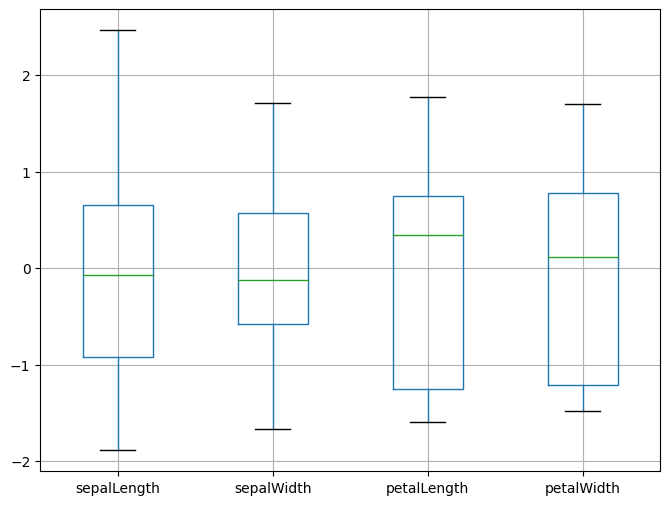

In [230]:
#Rechecking Box-Plot
df.boxplot(figsize = (8,6))
plt.show

No outliers prestent now.

In [231]:
df.skew()

C:\Users\91766\AppData\Local\Temp\ipykernel_18288\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


sepalLength    0.280417
sepalWidth     0.161632
petalLength   -0.309215
petalWidth    -0.126386
dtype: float64

   none of the columns are skewed 

## Bi-Variate Analysis

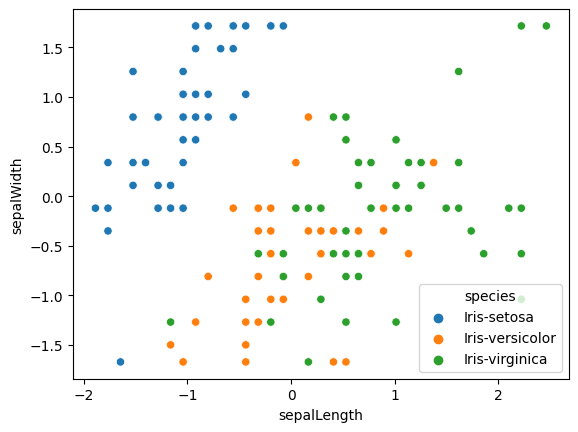

In [232]:
# Scatter plot of Sepal Length vs. Sepal Width colored by species
sns.scatterplot(x='sepalLength', y='sepalWidth', hue='species', data=df)
plt.show()



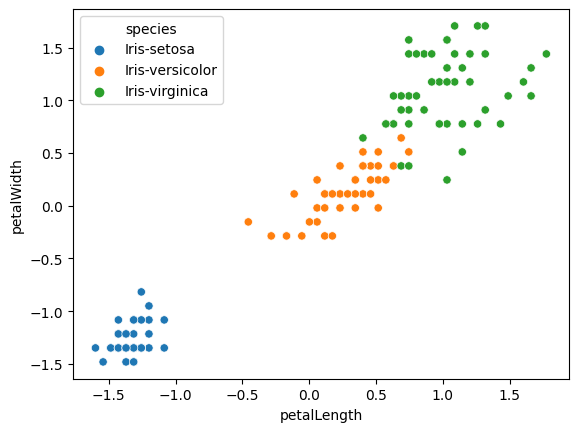

In [233]:
# Scatter plot of Petal Length vs. Petal Width colored by species
sns.scatterplot(x='petalLength', y='petalWidth', hue='species', data=df)
plt.show()


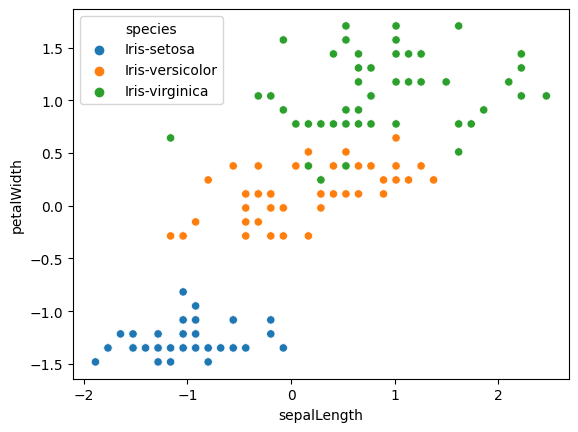

In [234]:
# Scatter plot of Sepal Length vs. Petal Width colored by species
sns.scatterplot(x='sepalLength', y='petalWidth', hue='species', data=df)
plt.show()


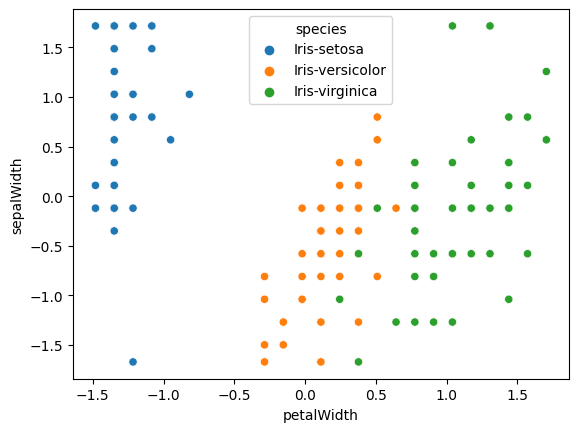

In [235]:
# Scatter plot of Sepal Length vs. Sepal Width colored by species
sns.scatterplot(x='petalWidth', y='sepalWidth', hue='species', data=df)
plt.show()


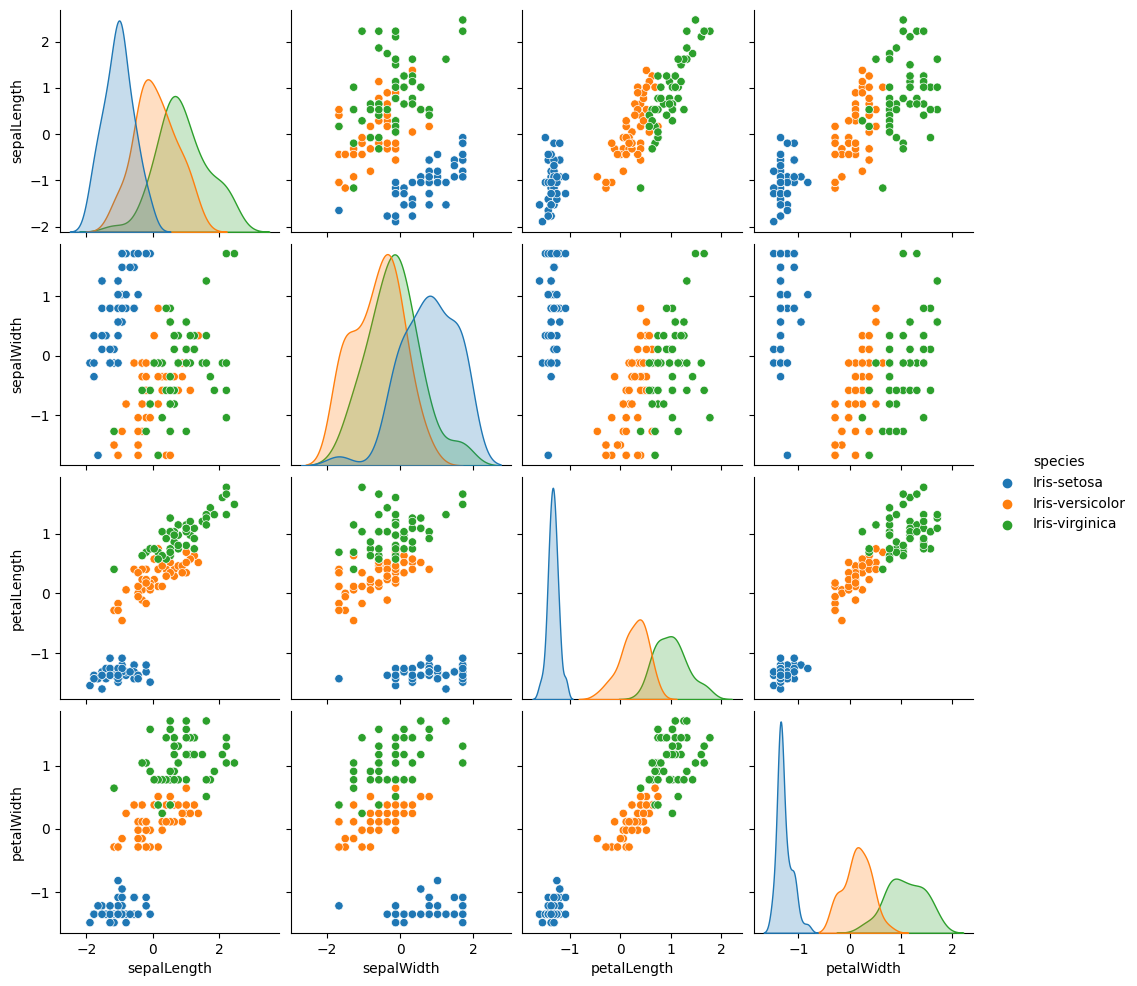

In [236]:
# Pairwise scatter plot of all features colored by species
sns.pairplot(df, hue='species')
plt.show()


C:\Users\91766\AppData\Local\Temp\ipykernel_18288\4087635370.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df.corr()


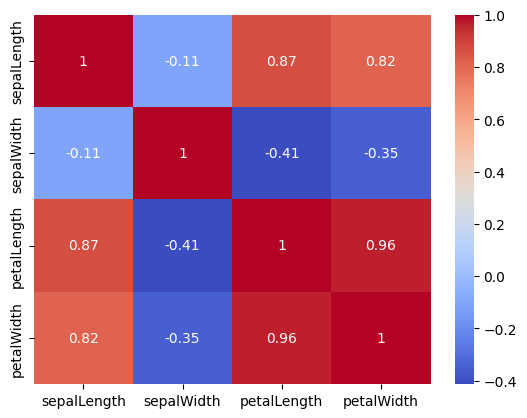

In [237]:
# Correlation matrix
correlation_matrix =df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [238]:
df.corr()

C:\Users\91766\AppData\Local\Temp\ipykernel_18288\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1.000000,-0.107295,0.870793,0.816015
sepalWidth,-0.107295,1.000000,-0.414068,-0.347911
petalLength,0.870793,-0.414068,1.000000,0.961405
petalWidth,0.816015,-0.347911,0.961405,1.000000


df.corr() shows high correlation among sepalLength~(petalLength,petalWidth) and petalLength~petalWidth
 Ignoring them as growth patterns of a flower can contribute to the correlation between these lenghts.

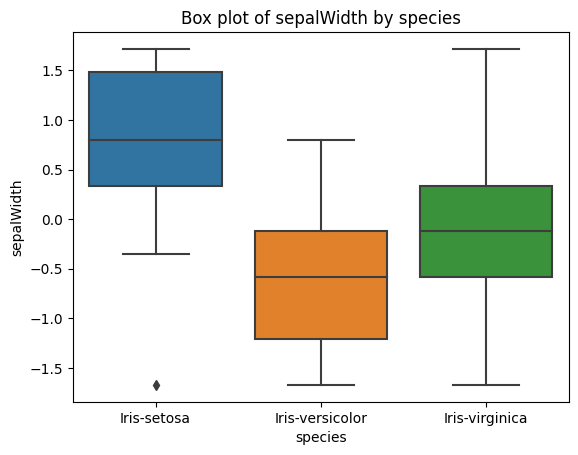

In [239]:
#Box Plot of Sepalwidth by species
sns.boxplot(x='species', y='sepalWidth', data=df)
plt.xlabel('species')
plt.ylabel('sepalWidth')
plt.title('Box plot of sepalWidth by species')
plt.show()


### Lable Encoder
 Used for datasets with multiple labels in one or more columns, these labels can be in form of word or numbers. Label encoding converts these into nnumeric forms 

In [256]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [257]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,-1.163209,-0.121116,-1.371062,-1.348531,0
1,-1.405129,0.338180,-1.428271,-1.348531,0
2,-1.526090,0.108532,-1.313853,-1.348531,0
3,-1.042248,1.256773,-1.371062,-1.348531,0
4,-0.558406,1.716069,-1.199434,-1.083008,0


## Model Training 

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [275]:
# Separate the features (X) and the target variable (y)
X = df.drop('species', axis=1)
y = df['species']

In [283]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [284]:
# Initialize and train the classification model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [285]:
# To get perfomance
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 100.0


In [286]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.29      0.50      0.36         4
           2       0.55      0.50      0.52        12

    accuracy                           0.47        30
   macro avg       0.44      0.48      0.45        30
weighted avg       0.49      0.47      0.47        30



C:\Users\91766\anaconda3\envs\Jack\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
